Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [52]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [53]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [54]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [55]:
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [56]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [57]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [58]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [59]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [60]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

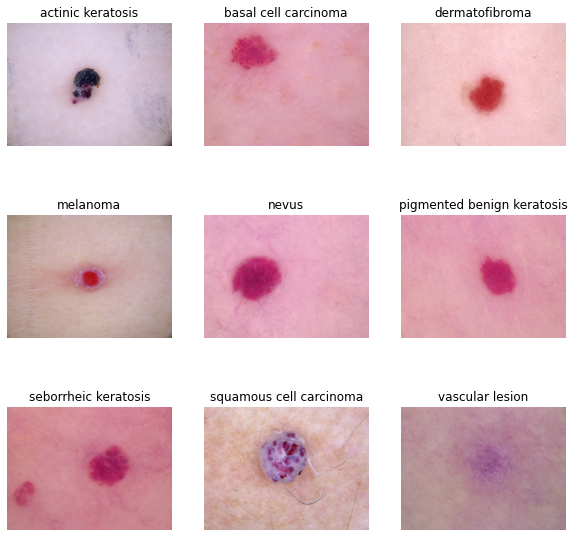

In [61]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(10,10))
for x in class_names:
  filename = list(data_dir_train.glob(x+'/*.jpg'))
  #print(filename[0])
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(PIL.Image.open(filename[i]))
  plt.title(class_names[i])
  plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [62]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [63]:
### Your code goes here


In [64]:
### Todo, choose an appropirate optimiser and loss function
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

Min and max pixel values: 0.0 1.0


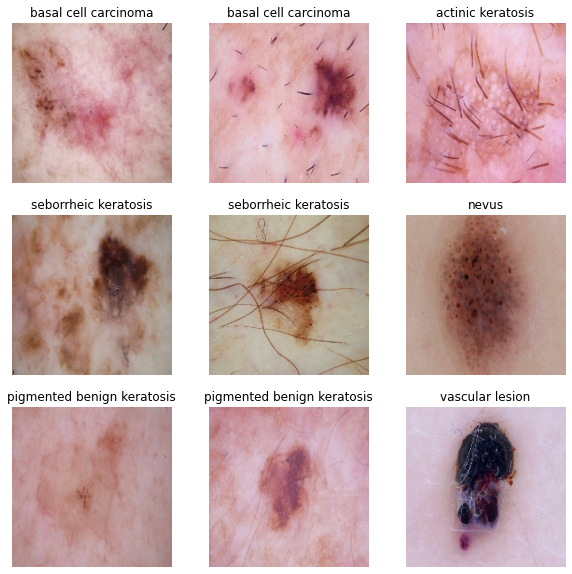

In [65]:
## verify the pixels are in [0-1]

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(img_height, img_width),
  layers.experimental.preprocessing.Rescaling(1./255)
])

image, label = next(iter(train_ds))

plt.figure(figsize=(10, 10))
result = resize_and_rescale(image)
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(image[i].numpy().astype("uint8"))
  plt.title(class_names[label[i]])
  plt.axis("off")

In [66]:
### Compile the model
##Choose an appropirate optimiser and loss function for model training 

In [67]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

### Train the model

In [69]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 10s 60ms/step - loss: 2.2485 - accuracy: 0.1712 - val_loss: 1.8885 - val_accuracy: 0.3073
Epoch 2/20
169/169 [==============================] - 5s 28ms/step - loss: 1.5795 - accuracy: 0.4123 - val_loss: 1.5467 - val_accuracy: 0.4016
Epoch 3/20
169/169 [==============================] - 5s 28ms/step - loss: 1.2569 - accuracy: 0.5406 - val_loss: 1.2637 - val_accuracy: 0.5204
Epoch 4/20
169/169 [==============================] - 5s 28ms/step - loss: 1.0360 - accuracy: 0.6333 - val_loss: 1.0725 - val_accuracy: 0.6110
Epoch 5/20
169/169 [==============================] - 5s 28ms/step - loss: 0.8036 - accuracy: 0.7264 - val_loss: 1.0697 - val_accuracy: 0.6459
Epoch 6/20
169/169 [==============================] - 5s 28ms/step - loss: 0.6368 - accuracy: 0.7841 - val_loss: 0.9913 - val_accuracy: 0.6867
Epoch 7/20
169/169 [==============================] - 5s 28ms/step - loss: 0.5173 - accuracy: 0.8249 - val_loss: 0.9301 - val_accuracy: 0.700

### Visualizing training results

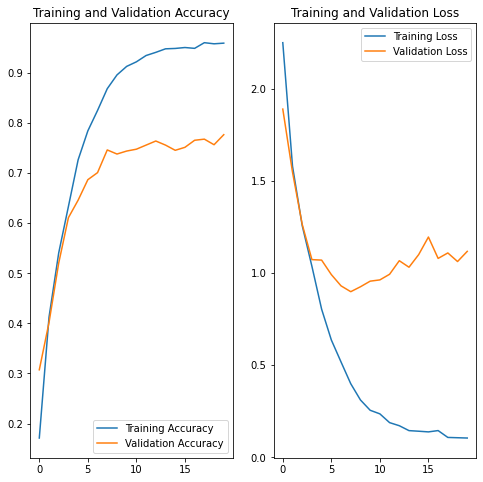

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
- Clearly the model is overfitting as train accrucay is high whereas validation accuracy is comparatively very low.
Overfitting could be because of less number of training examples, let's create some augmented images for larger training dataset.

In [71]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3), seed=123),
    layers.experimental.preprocessing.RandomRotation(0.1, seed=123),
    layers.experimental.preprocessing.RandomZoom(0.1, seed=123),
  ]
)

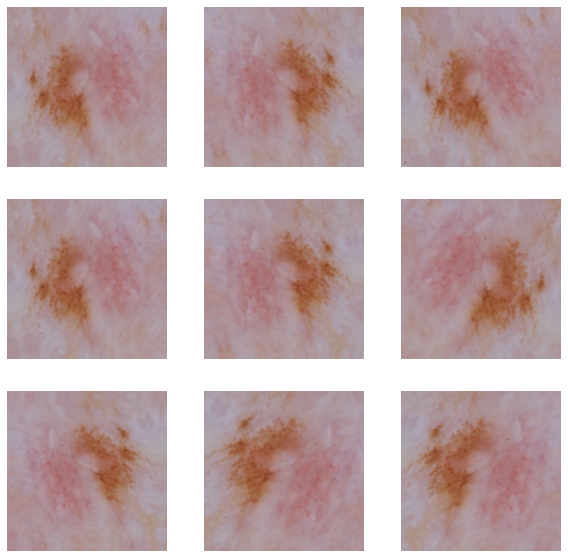

In [72]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [73]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model2 = Sequential()
model2.add(data_augmentation)
model2.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model2.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D())
model2.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D())
model2.add(layers.Dropout(0.2))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(9, activation='softmax'))

### Compiling the model

In [74]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [75]:
## Your code goes here, note: train your model for 20 epochs

history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 8s 42ms/step - loss: 2.1644 - accuracy: 0.1818 - val_loss: 2.0304 - val_accuracy: 0.2042
Epoch 2/20
169/169 [==============================] - 7s 41ms/step - loss: 1.7501 - accuracy: 0.3255 - val_loss: 1.5780 - val_accuracy: 0.3838
Epoch 3/20
169/169 [==============================] - 7s 41ms/step - loss: 1.4703 - accuracy: 0.4384 - val_loss: 1.4236 - val_accuracy: 0.4491
Epoch 4/20
169/169 [==============================] - 7s 41ms/step - loss: 1.3528 - accuracy: 0.4841 - val_loss: 1.4388 - val_accuracy: 0.4588
Epoch 5/20
169/169 [==============================] - 7s 41ms/step - loss: 1.2945 - accuracy: 0.5121 - val_loss: 1.3432 - val_accuracy: 0.4855
Epoch 6/20
169/169 [==============================] - 7s 41ms/step - loss: 1.2203 - accuracy: 0.5445 - val_loss: 1.2156 - val_accuracy: 0.5583
Epoch 7/20
169/169 [==============================] - 7s 41ms/step - loss: 1.1553 - accuracy: 0.5614 - val_loss: 1.1068 - val_accuracy: 0.5805

### Visualizing the results

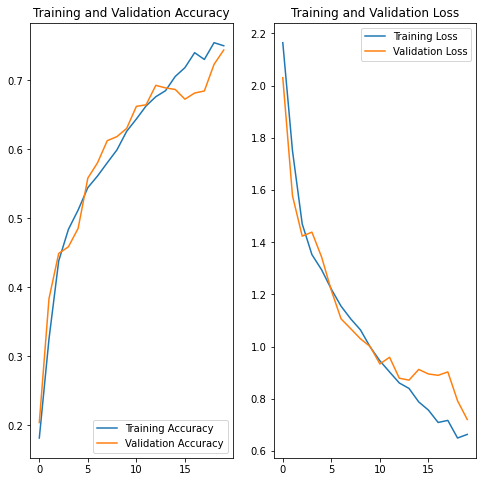

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Now the model is not overfitting but accuracy is quite low, we need to increase the accuracy.
Below avg Accuracy could be due to class imbalance in our dataset, so will try to balance our dataset and re train our model to see the results.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [77]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list[0]

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list[0]

dataframe_dict_new = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
- Which class has the least number of samples?
seborrheic keratosis
- Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [78]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [79]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset)+"/"+str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1B4C0CE490>:   0%|          | 1/500 [00:00<01:08,  7.33 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1B4C608890>: 100%|██████████| 500/500 [00:18<00:00, 27.51 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1B4C5C1690>:   0%|          | 1/500 [00:00<01:05,  7.58 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B4C83DA90>: 100%|██████████| 500/500 [00:17<00:00, 27.97 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B4C6E5BD0>:   0%|          | 1/500 [00:00<00:54,  9.21 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B420BDA90>: 100%|██████████| 500/500 [00:18<00:00, 26.84 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1B4C62FED0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B4C032210>: 100%|██████████| 500/500 [01:22<00:00,  6.05 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B42CD6050>: 100%|██████████| 500/500 [00:18<00:00, 26.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1B4C7C85D0>: 100%|██████████| 500/500 [00:39<00:00, 12.64 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B436F4150>: 100%|██████████| 500/500 [00:18<00:00, 27.36 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1B4C07BF90>:   0%|          | 1/500 [00:00<01:12,  6.87 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1ACA118410>: 100%|██████████| 500/500 [00:18<00:00, 26.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [80]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [81]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026324.jpg_09a9399f-304b-4c3b-8e10-5b5ee4f22f25.jpg'

In [82]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0]

'basal cell carcinoma'

In [83]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [84]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [85]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [86]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [87]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [88]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [89]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [90]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03137255 0.99917704


In [91]:
model3 = Sequential()
model3.add(data_augmentation)
model3.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.MaxPooling2D())
model3.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model3.add(layers.MaxPooling2D())
model3.add(layers.Dropout(0.2))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(9, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [92]:
## your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_9 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 90, 90, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 45, 45, 64)       

#### **Todo:**  Train your model

In [94]:
epochs = 30

history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 20s 70ms/step - loss: 1.7526 - accuracy: 0.3310 - val_loss: 1.4167 - val_accuracy: 0.4833
Epoch 2/30
281/281 [==============================] - 11s 41ms/step - loss: 1.4173 - accuracy: 0.4565 - val_loss: 1.2686 - val_accuracy: 0.5251
Epoch 3/30
281/281 [==============================] - 12s 41ms/step - loss: 1.2621 - accuracy: 0.5171 - val_loss: 1.1835 - val_accuracy: 0.5581
Epoch 4/30
281/281 [==============================] - 11s 41ms/step - loss: 1.1765 - accuracy: 0.5563 - val_loss: 1.0864 - val_accuracy: 0.5977
Epoch 5/30
281/281 [==============================] - 11s 41ms/step - loss: 1.0852 - accuracy: 0.5876 - val_loss: 0.9793 - val_accuracy: 0.6502
Epoch 6/30
281/281 [==============================] - 11s 41ms/step - loss: 1.0125 - accuracy: 0.6159 - val_loss: 0.9630 - val_accuracy: 0.6551
Epoch 7/30
281/281 [==============================] - 12s 41ms/step - loss: 0.9509 - accuracy: 0.6444 - val_loss: 0.9011 - val_accuracy:

#### **Todo:**  Visualize the model results

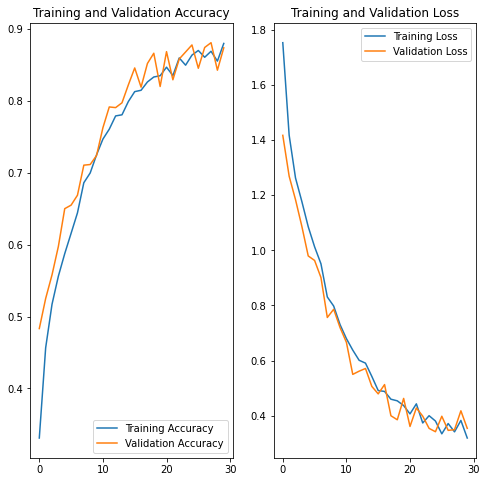

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [97]:
#### After handling class imbalance below are the observations:

#### - Validation accuracy is boosted and training accuracy is also very good.
#### - If required to make our model more robust, we can add few more convolution layers as well.